In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

# 1. Project_01_Diabetes 

## (1)~(3) 데이터 이해하기

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes_data = diabetes.data
diabetes_target = diabetes.target
print(diabetes_data.shape)
print(diabetes_target.shape)

(442, 10)
(442,)


In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes['target'] = diabetes_target
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
diabetes.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


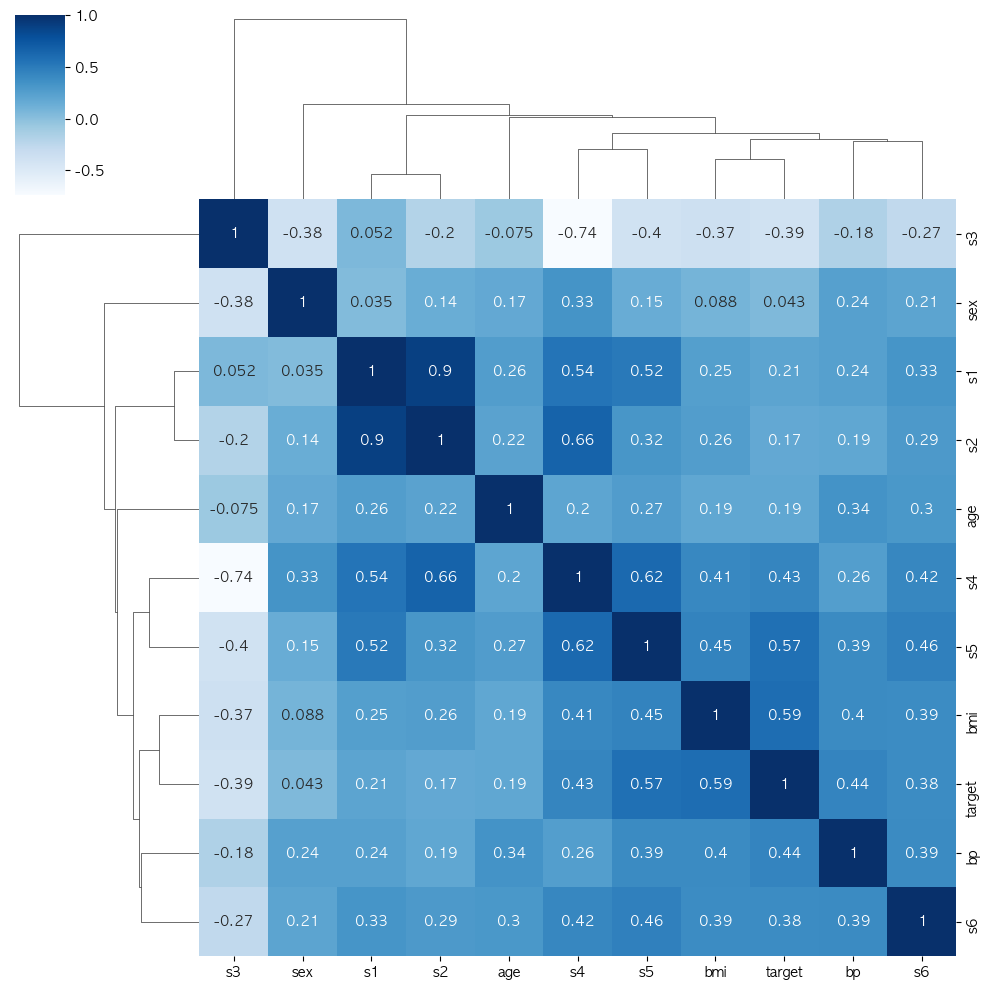

In [8]:
sns.clustermap(diabetes.corr(), annot=True, cmap='Blues')
plt.show()

## (4) train 데이터와 test 데이터로 분리하기

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [10]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [12]:
def gradient(X, W, b, y):
    N = len(y)                            # N은 데이터 포인트의 개수
    y_pred = model(X, W, b)               # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y)    # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean()          # b의 gradient 계산
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기

In [13]:
LEARNING_RATE = 0.1

## (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.

In [14]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6249.4073
Iteration 20 : Loss 5907.3534
Iteration 30 : Loss 5830.8312
Iteration 40 : Loss 5759.6194
Iteration 50 : Loss 5690.6417
Iteration 60 : Loss 5623.7889
Iteration 70 : Loss 5558.9886
Iteration 80 : Loss 5496.1714
Iteration 90 : Loss 5435.2703
Iteration 100 : Loss 5376.2206
Iteration 110 : Loss 5318.9599
Iteration 120 : Loss 5263.4278
Iteration 130 : Loss 5209.5664
Iteration 140 : Loss 5157.3193
Iteration 150 : Loss 5106.6325
Iteration 160 : Loss 5057.4537
Iteration 170 : Loss 5009.7324
Iteration 180 : Loss 4963.4199
Iteration 190 : Loss 4918.4693
Iteration 200 : Loss 4874.8350
Iteration 210 : Loss 4832.4734
Iteration 220 : Loss 4791.3422
Iteration 230 : Loss 4751.4005
Iteration 240 : Loss 4712.6089
Iteration 250 : Loss 4674.9295
Iteration 260 : Loss 4638.3254
Iteration 270 : Loss 4602.7614
Iteration 280 : Loss 4568.2031
Iteration 290 : Loss 4534.6175
Iteration 300 : Loss 4501.9728
Iteration 310 : Loss 4470.2382
Iteration 320 : Loss 4439.3839
Iteration 330 : L

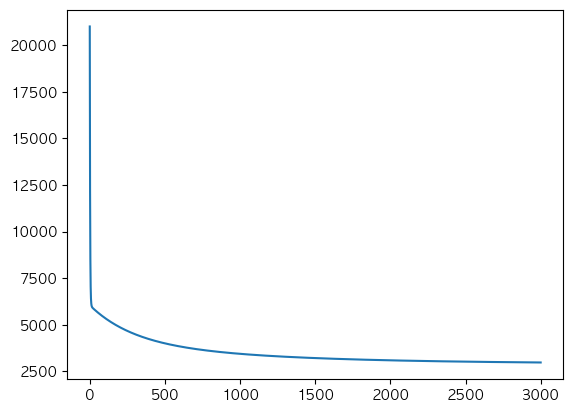

In [15]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [16]:
print(W)
print(b)

[  49.87728846 -151.34531194  446.76804554  295.99429002  -39.44659247
  -85.56049665 -205.00627366  146.92467652  337.09836313  138.81312767]
151.547317109581


## (10) test 데이터에 대한 성능 확인하기

In [17]:
prediction = model(X_test, W, b)
print(prediction)
mse = loss(X_test, W, b, y_test)
print(mse)

[148.7289732  171.7161014  147.45132168 282.68380671 132.11205964
 106.94912219 245.18518436 195.93852238  95.04929716 121.57994933
 100.04798396 148.01773806  66.60710855 210.54652098 111.93693129
 135.93175055 222.70488298 244.31654243 185.75139675 211.58432786
 191.53899352  94.73470041  80.81116698 188.59559665 149.51592024
 165.69637138 184.89785278 175.71598246  55.11595751 125.44244902
 177.25385733  97.35764344 136.84346456 183.05380066 174.30643388
 188.39804663 132.26323902 131.75618075 160.88574453  65.40629301
  88.18843834 117.56466948 156.58099083 160.80635605 171.58734086
  70.07247711  84.96687968 104.88804121  65.63328633 149.52485913
 144.79669932  68.11868759 122.7496387  111.74998878 174.52683494
 147.86677325 104.58483045 197.31583017 113.93998694  70.32693981
 183.56357292 187.41434436 139.42719495 118.75671443 128.5208653
 192.23497253 172.45944794 160.58979526 107.42737032 141.87809022
 176.08738508 197.65875272 238.73915701 141.91601546  85.70289787
 156.929073

## (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

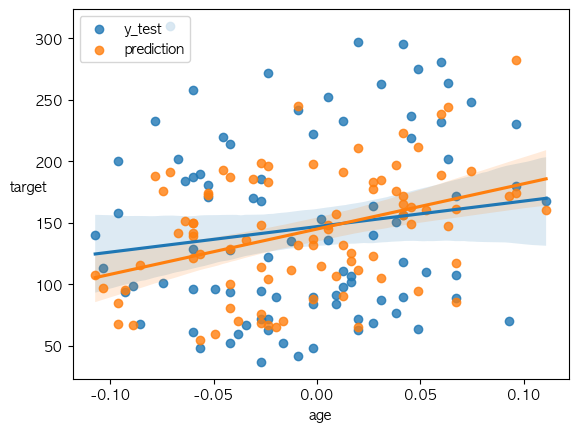

In [18]:
sns.regplot(data=diabetes, x=X_test[:, 0], y=y_test, label='y_test') 
sns.regplot(data=diabetes, x=X_test[:, 0], y=prediction, label='prediction')
plt.legend(loc='upper left')
plt.xlabel('age')
plt.ylabel('target', rotation=0)
plt.show()

# 2. Project_02_Bike_Sharing_Demand 
: 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [19]:
df = pd.read_csv('bike_sharing_demand/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [20]:
df['year'] = df['datetime'].str[:4].astype(int)
df['month'] = df['datetime'].str[5:7].astype(int)
df['day'] = df['datetime'].str[9:11].astype(int)
df['hour'] = df['datetime'].str[11:13].astype(int)
df['minute'] = df['datetime'].str[14:16]
df['second'] = df['datetime'].str[17:19]
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,00,00


In [21]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

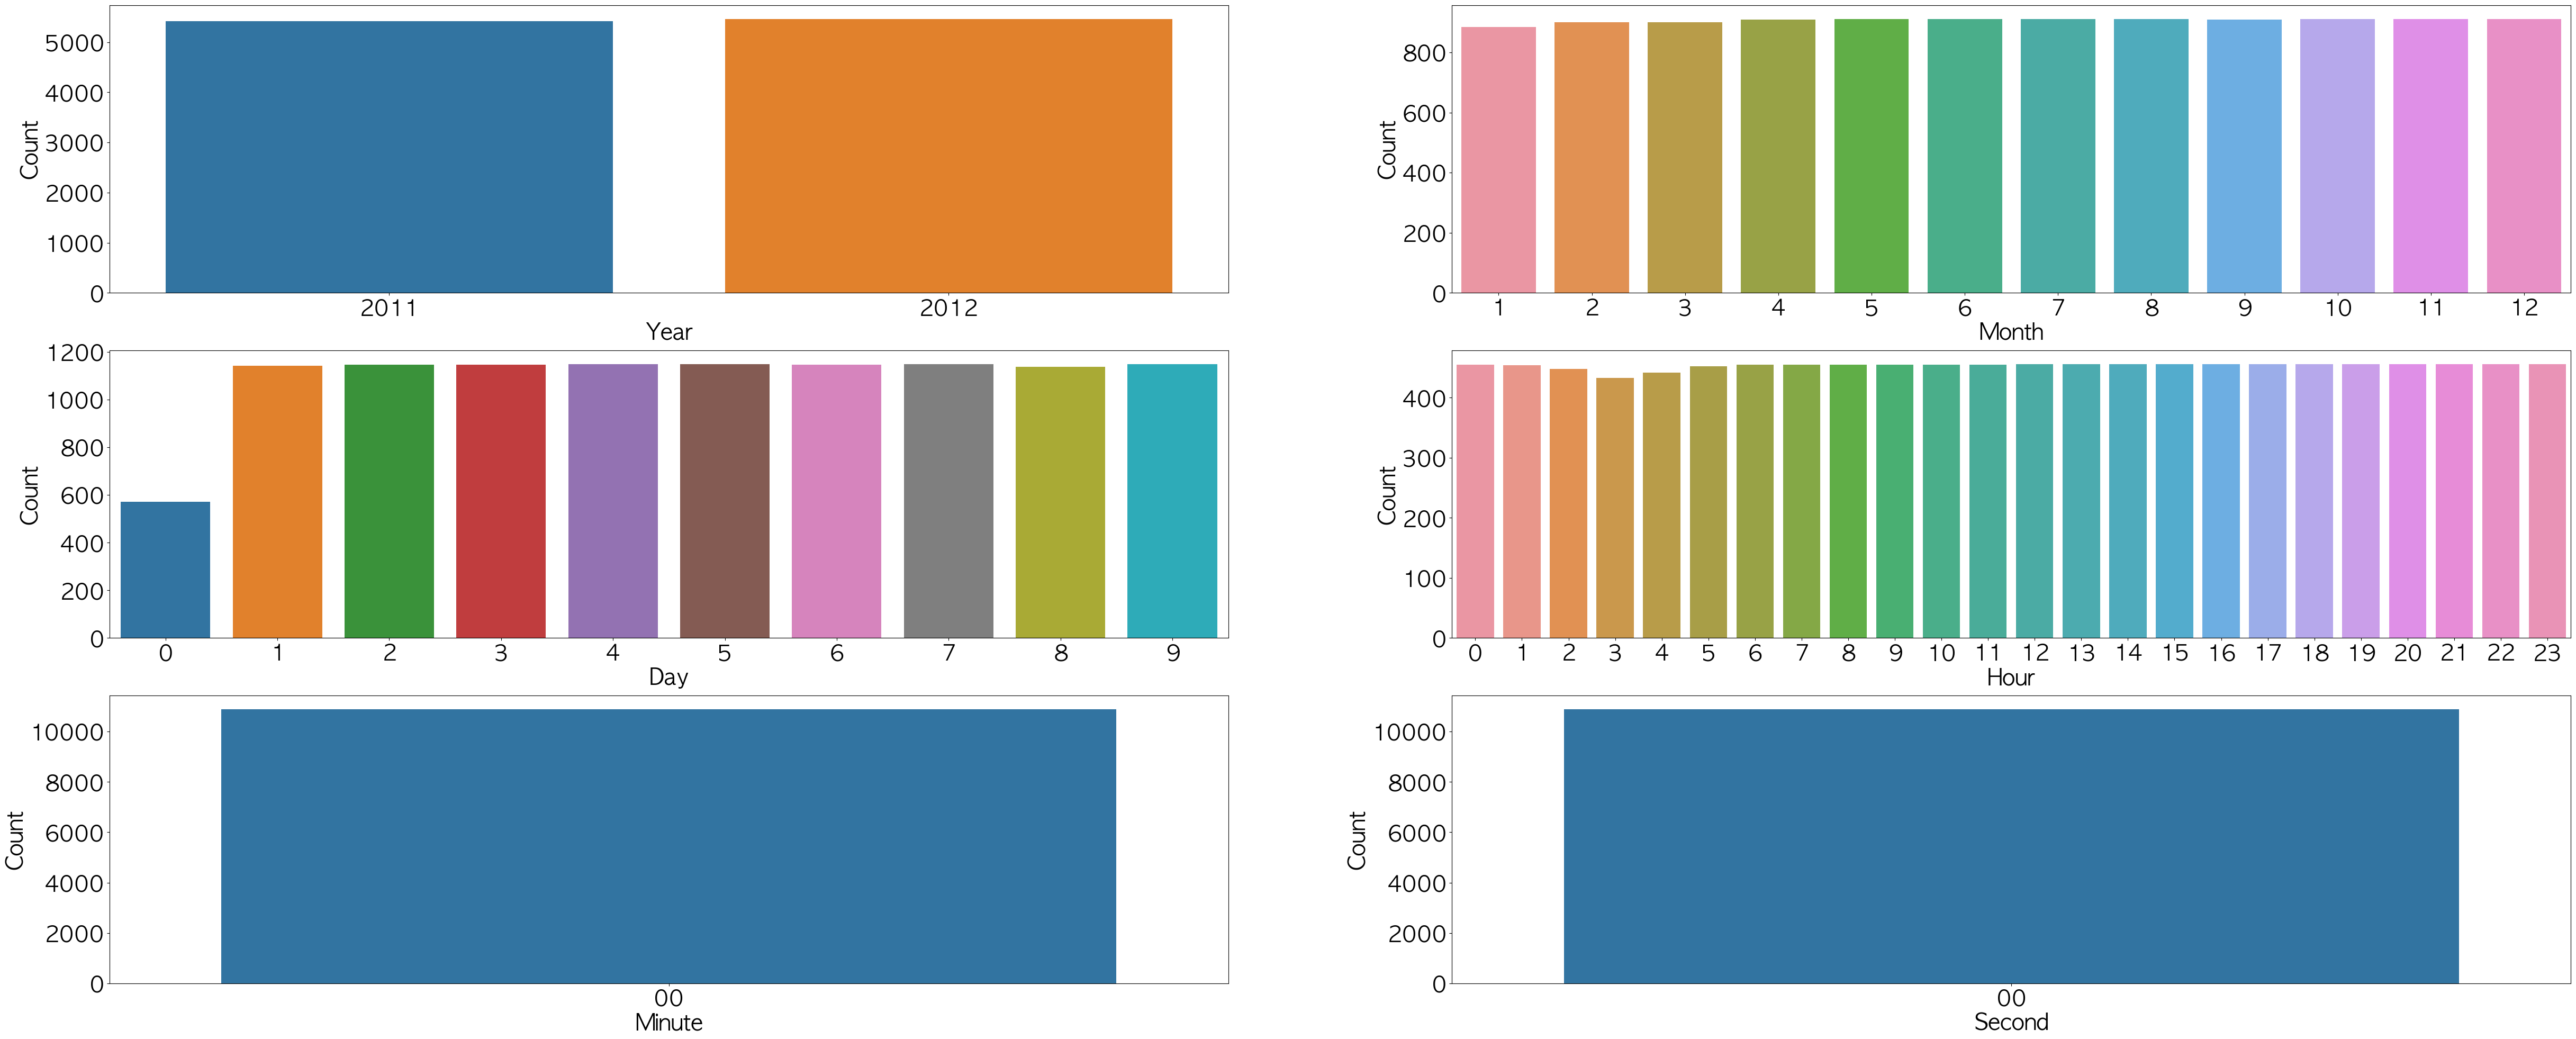

In [22]:
plt.figure(figsize = (60, 24))

plt.subplot(3, 2, 1)
sns.countplot(data=df, x='year')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Count', fontsize = 30)

plt.subplot(3, 2, 2)
sns.countplot(data=df, x='month')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.ylabel('Count', fontsize = 30)

plt.subplot(3, 2, 3)
sns.countplot(data=df, x='day')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Day', fontsize = 30)
plt.ylabel('Count', fontsize = 30)

plt.subplot(3, 2, 4)
sns.countplot(data=df, x='hour')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Hour', fontsize = 30)
plt.ylabel('Count', fontsize = 30)

plt.subplot(3, 2, 5)
sns.countplot(data=df, x='minute')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Minute', fontsize = 30)
plt.ylabel('Count', fontsize = 30)

plt.subplot(3, 2, 6)
sns.countplot(data=df, x='second')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Second', fontsize = 30)
plt.ylabel('Count', fontsize = 30)

plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

### -1) X(feature)에는 어떤 데이터 컬럼을 넣어야 될까?

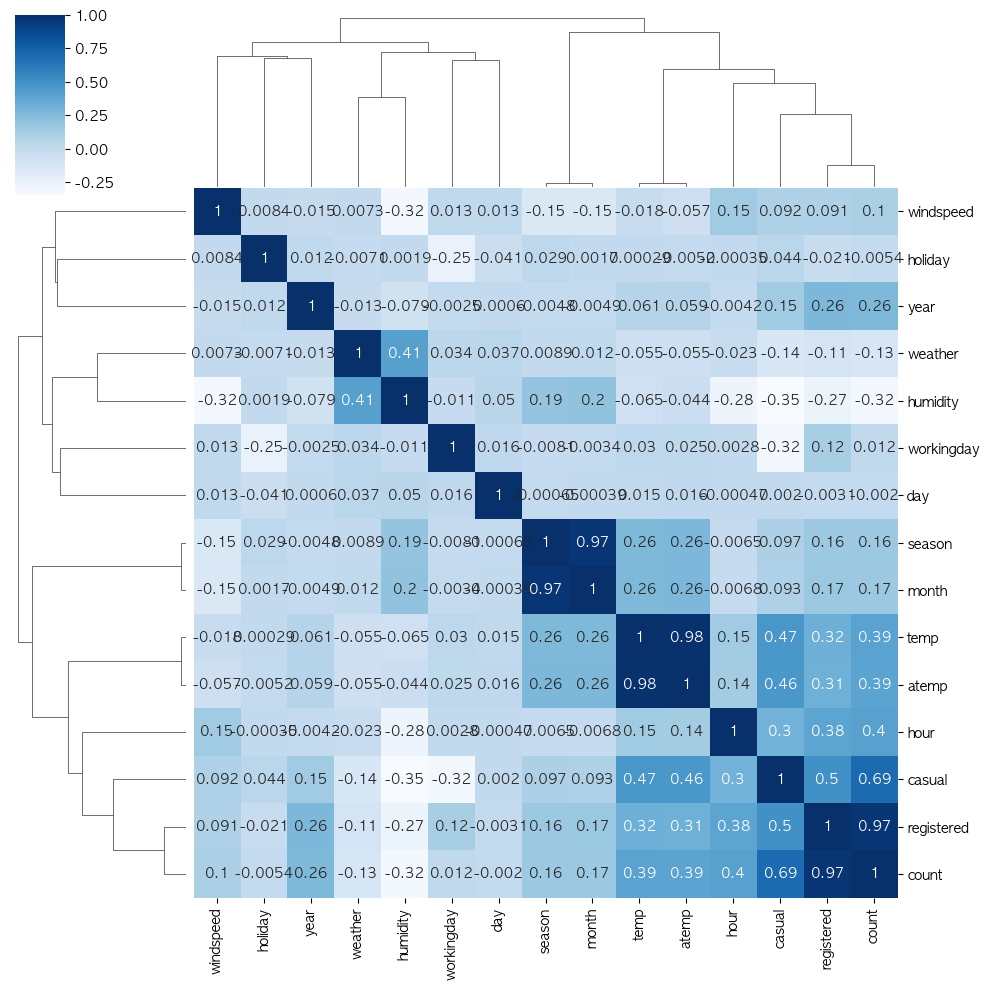

In [23]:
# 유사도가 높은 순서대로 계층적으로 클러스터(Hierarchical Clustering) 형성
sns.clustermap(df.corr(), annot=True, cmap='Blues');

# → registered(0.97) casual(0.69) hour(0.4) temp(0.39) atemp(0.39) humidity(-0.32)
# → temp와 atemp : 둘의 상관관계가 높고, 다른 지표들과의 상관관계도 거의 비슷하므로 temp만 사용

In [24]:
X = df[['registered', 'casual', 'hour', 'temp', 'humidity']].values
X

array([[ 13.  ,   3.  ,   0.  ,   9.84,  81.  ],
       [ 32.  ,   8.  ,   1.  ,   9.02,  80.  ],
       [ 27.  ,   5.  ,   2.  ,   9.02,  80.  ],
       ...,
       [164.  ,   4.  ,  21.  ,  13.94,  61.  ],
       [117.  ,  12.  ,  22.  ,  13.94,  61.  ],
       [ 84.  ,   4.  ,  23.  ,  13.12,  66.  ]])

### - 2) count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [25]:
y = df['count'].values
y

array([ 16,  40,  32, ..., 168, 129,  88])

## (5) LinearRegression 모델 학습

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [27]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)
print(y_predict)

mse = mean_squared_error(y_test, y_predict)
print(mse)

rmse = mse ** 0.5
print(rmse)

[127.  13. 163. ... 509.   5. 239.]
3.014996241727671e-26
1.7363744532005966e-13


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에는 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에는 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [ ]:
plt.figure(figsize = (60, 60))

plt.subplot(2, 1, 1)
plt.bar(X_test[:, 3]+0.0, y_test, label='y_test', color='b', width=0.5)
plt.bar(X_test[:, 3]+0.5, y_predict, label='y_predict', color='grey', width=0.5)
plt.legend(fontsize=40, loc='upper left')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Temp', fontsize=40)
plt.ylabel('Count', fontsize=40, rotation=0)

plt.subplot(2, 1, 2)
plt.bar(X_test[:, 4]+0.0, y_test, label='y_test', color='b', width=0.5)
plt.bar(X_test[:, 4]+0.5, y_predict, label='y_predict', color='grey', width=0.5)
plt.legend(fontsize=40, loc='upper left')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Humidity', fontsize=40)
plt.ylabel('Count', fontsize=40, rotation=0)

plt.show()

# 3. 결론

- [Diabetes] 첫 번째 프로젝트에서는 sklearn.dataset에서 제공하는 당뇨병 데이터를 사용하여 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보았다.

   이를 위해 (1) 데이터 가져오기 → (2) 모델에 입력할 데이터 X 준비하기 → (3) 모델에 예측할 데이터 y 준비하기 → (4) train 데이터와 test 데이터로 분리하기 → (5) 모델 준비하기 → (6) 손실함수 loss 정의하기 → (7) 기울기를 구하는 gradient 함수 구현하기 → (8) 하이퍼 파라미터인 학습률 설정하기 → (9) 모델 학습하기 → (10) test 데이터에 대한 성능 확인하기 → (11) 정답 데이터와 예측한 데이터 시각화하기의 과정을 거쳤다.
   
   0.1의 학습률로 약 3000번 시행 시, MSE 손실함수값이 3000 이하를 달성한다.

   회귀분석(추정)하려는 target과 상관관계가 가장 높은 항목은 'bmi'이므로, 추후 'bmi'와 target에 대한 추가적인 연구가 필요하겠다.
   
   cf) loss값이 큰 이유는 상대적으로 x값들에 비해 y값이 매우 크기 때문에 (-0.2<x<0.2, 25<y<346) 일어나는 현상이다.(데이터 셋-전처리(preprocessing)가 필요하다.) 
  
   [2] https://yhyun225.tistory.com/11

_______________________________________________________________________

- [Bike_Sharing_Demand] 두 번째 프로젝트에서는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측해 보았다. 여기에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용했다.
  
  이를 위해 (1) 데이터 가져오기 → (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기 → (3) year, month, day, hour, minute, second 데이터 개수 시각화하기 → (4) X, y 컬럼 선택 및 train/test 데이터 분리 → (5) LinearRegression 모델 학습 → (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산 → (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기의 과정을 거쳤다.
  
  회귀분석(추정)하려는 count와 상관관계가 높은 항목은 'registered', 'casual', 'hour', 'temp', 'humidity'의 5가지이며, 'atemp' 항목은 'temp'항목과 상관관계가 매우 높고 또한 두 항목의 다른 항목과의 상관관계도 매우 유사하므로 'temp'항목만 X값에 사용하였다.

# 4. References

[1] https://lms.aiffel.io/course/382/node/649

[2] https://yhyun225.tistory.com/11